In [172]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd

import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls

shan_token = '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'
token = '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'
n2p = Notion2PandasClient(auth=token)

lnk = 'c2f3395c7ed34b3684c8b881290c5c7c' # Resonators 
#lnk = '1188a47d722080a297ddf2f21c956b4c' # Llotsa

## Load data

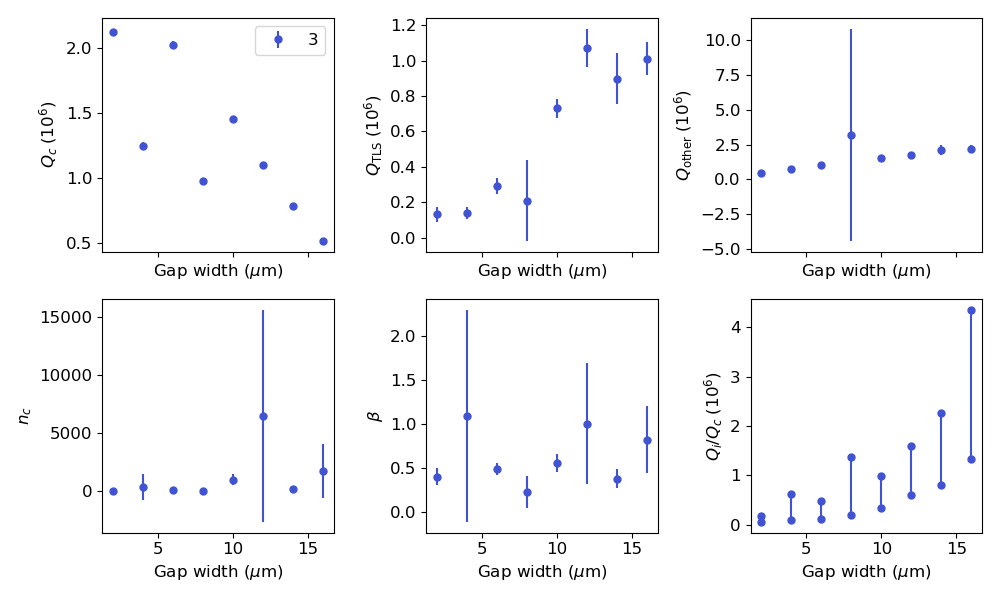

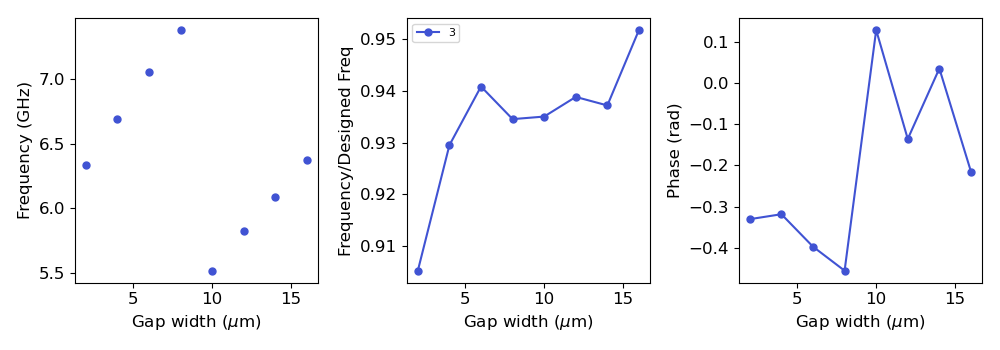

In [184]:
pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 
pnames=['240908-ResonatorSilSQsilicon-scalinq-0']
#pnames = ['240729-2', '240729-3']
#pnames = ['240729-3', '240820_soc']
#labs = ['VNA (HF)', 'RFSoC (HF)'] 
#pnames = ['silicon-scalinq-3', 'silicon-scalinq-2', 'silicon-scalinq-1']
labs = ['3', '2', '1']
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))
%matplotlib widget 
ana_tls.plot_res_pars(plist, labs,img_pth)
ana_res.plot_res_pars(plist, labs,img_pth)


In [191]:
cols=['freqs', 'pitch', 'qc', 'qc_err', 'qother', 'qtls0', 'qtls0_err', 'qother_err', 'target_freq']
new_df = pd.DataFrame({col: plist[0][col] for col in cols})


## Grab the data we want from yml, and add a few more fields

In [192]:
# Now, make a df that has the same columns as the notion DB
i=4 
j=i
#res_data = pd.DataFrame(plist[0])
#new_df = res_data[['freqs', 'pitch', 'qc', 'qc_err', 'qother', 'qtls0', 'qtls0_err', 'qother_err', 'target_freq']]
names = ['Sapp1_HF', 'Sapp1_NoHF', 'Sapp1_SQ', 'Sil1', 'Sil1_SQ']
# 3 from the first sappphrie wafer 
# 2 from silicon 
# 2 from 2nd silicon :(
# 
if names[j]=='Sapp1_HF':
    metal = 'Nb'
    substrate='Sapphire'
    depo = 'KJL2'
    notes = 'HF'
    meas='VNA'
    package = 'SLab'
    time_dict =  {'start': '2024-07-29', 'end': None, 'time_zone': None}
elif names[j]=='Sapp1_NoHF':
    metal = 'Nb'
    substrate='Sapphire'
    depo = 'KJL2'
    notes = ''
    meas='VNA'
    package = 'SLab'
    time_dict =  {'start': '2024-07-29', 'end': None, 'time_zone': None}
elif names[j]=='Sapp1_SQ':
    metal = 'Nb'
    substrate='Sapphire'
    depo = 'KJL2'
    notes = ''
    meas='VNA'
    package = 'ScalinQ'
    time_dict =  {'start': '2024-08-14', 'end': None, 'time_zone': None}
elif names[j]=='Sil1_SQ':
    metal = 'Nb'
    substrate='Silicon'
    depo = 'KJL2'
    notes = ''
    meas='VNA'
    package = 'ScalinQ'
    time_dict =  {'start': '2024-09-08', 'end': None, 'time_zone': None}

name = names[j]
new_df['Date'] = new_df.apply(lambda row: time_dict, axis=1)
new_df['Metal'] = metal
new_df['Substrate'] = substrate
new_df['Depo']=depo
new_df['Package']=package
new_df['Measurement']=meas
new_df['Notes'] = notes
new_df['PageID']=''
new_df['Row_Hash']=''
new_df['Fridge Cool Down']=''
new_df['Name']=name
new_df['Samples']=''

new_df.rename(columns={'pitch': 'Gap (um)', 'qtls0': 'QTLS0 (1e6)', 'qother': 'Qother (1e6)', 'qother_err':'Qother err (1e6)', 'qc':'Qc (1e6)', 'qc_err':'Qc err (1e6)','qtls0_err':'QTLS0 err (1e6)', 'target_freq':'Target Freq. (GHz)', 'freqs':'Freq (GHz)' }, inplace=True)
#df = df.append(new_row, ignore_index=True)
round_cols = ['QTLS0 (1e6)', 'Qother (1e6)', 'Qc (1e6)', 'Qc err (1e6)', 'QTLS0 err (1e6)', 'Qother err (1e6)']
new_df[round_cols] = new_df[round_cols] / 1e6
new_df['Freq (GHz)'] = new_df['Freq (GHz)'] / 1e9

new_df[round_cols] = new_df[round_cols].round(4)
f_cols = ['Freq (GHz)', 'Target Freq. (GHz)']
new_df[f_cols] = new_df[f_cols].round(7)
#new_df = new_df.astype(str)
print(package)

ScalinQ


In [176]:
new_df

,Freq (GHz),Gap (um),Qc (1e6),Qc err (1e6),Qother (1e6),QTLS0 (1e6),QTLS0 err (1e6),Qother err (1e6),Target Freq. (GHz),Date,...,Substrate,Depo,Package,Measurement,Notes,PageID,Row_Hash,Fridge Cool Down,Name,Samples
0,6.711797,2,3.5066,0.0396,3.2300,0.5512,0.0376,0.9566,7.0,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
1,7.063651,4,1.7155,0.0126,5.2655,0.7273,0.1094,4.5428,7.2,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
2,7.447063,6,1.8114,0.0140,3.6960,0.8915,0.0371,0.5554,7.5,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
3,7.785147,8,1.9585,0.0179,3.7603,0.9589,0.1234,1.5488,7.9,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
4,5.816874,10,1.9258,0.0150,0.7095,1.2945,0.6812,0.1800,5.9,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
5,6.136377,12,2.6881,0.0242,1.0328,1.2872,0.3494,0.1762,6.2,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
6,6.423090,14,1.7040,0.0224,0.3014,3.7466,1.0864,0.0041,6.5,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,
7,6.723186,16,0.3176,0.0009,0.5298,0.5126,1.2245,1.1153,6.7,"{'start': '2024-08-14', 'end': None, 'time_zon...",...,Sapphire,KJL2,ScalinQ,VNA,,,,,Sapp1_SQ,


### Load notion database and get info

In [193]:
notion_df = n2p.from_notion_DB_to_dataframe(lnk)

### They need to have all the same rows and columns

In [194]:
#print(notion_df.columns)
#print(new_df.columns)

common_columns = notion_df.columns.intersection(new_df.columns)
print("Common columns:", common_columns)

notion_only_columns = notion_df.columns.difference(new_df.columns)
print("Columns only in notion_df:", notion_only_columns)

new_df_only_columns = new_df.columns.difference(notion_df.columns)
print("Columns only in new_df:", new_df_only_columns)

Common columns: Index(['Gap (um)', 'Target Freq. (GHz)', 'Qother (1e6)', 'Measurement',
       'Notes', 'Freq (GHz)', 'Package', 'Qother err (1e6)', 'Qc err (1e6)',
       'Samples', 'QTLS0 (1e6)', 'Fridge Cool Down', 'Depo', 'QTLS0 err (1e6)',
       'Qc (1e6)', 'Date', 'Metal', 'Substrate', 'Name', 'PageID', 'Row_Hash'],
      dtype='object')
Columns only in notion_df: Index(['Text'], dtype='object')
Columns only in new_df: Index([], dtype='object')


### Combine DFs

In [179]:
combined_df = pd.concat([notion_df, new_df], ignore_index=True)
print(combined_df)
#combined_df.columns

    Gap (um)  Target Freq. (GHz)  Qother (1e6) Measurement Notes  Freq (GHz)  \
0       16.0                 6.7        0.5298         VNA          6.723186   
1       14.0                 6.5        0.3014         VNA          6.423090   
2       12.0                 6.2        1.0328         VNA          6.136377   
3       10.0                 5.9        0.7095         VNA          5.816874   
4        8.0                 7.9        3.7603         VNA          7.785147   
5        6.0                 7.5        3.6960         VNA          7.447063   
6        4.0                 7.2        5.2655         VNA          7.063651   
7        2.0                 7.0        3.2300         VNA          6.711797   
8       16.0                 6.7        0.5298         VNA    HF    6.723186   
9       14.0                 6.5        0.3014         VNA    HF    6.423090   
10      12.0                 6.2        1.0328         VNA    HF    6.136377   
11      10.0                 5.9        

### Update notion

In [195]:
n2p.update_notion_DB_from_dataframe(lnk, combined_df)
